In [1]:
import satellite_cloud_generator as scg
from utils.ops import load_opt_image, save_geotiff
from pathlib import Path
from matplotlib import pyplot as plt
from einops import rearrange


In [2]:
opt_image = Path(r'D:\Ferrari\Projects\cloud_gen\clear_2.tif')

In [3]:
opt_data = load_opt_image(opt_image)

In [4]:
opt_data[:,:,[3, 2, 1]].shape

(2021, 2502, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


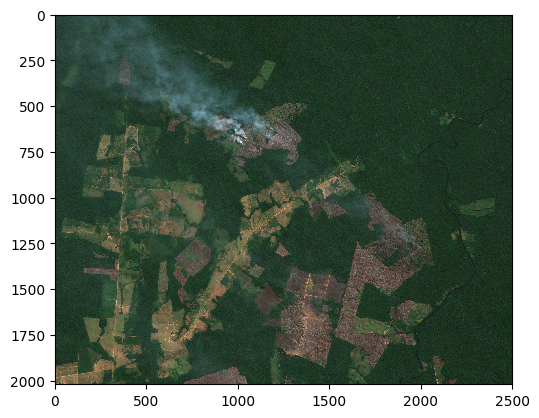

In [5]:
plt.imshow(opt_data[:,:,[2, 1, 0]]*5, interpolation='nearest')
plt.show()

In [ ]:
cf_opt_data = rearrange(opt_data, 'h w c -> c h w')

In [88]:
my_gen=scg.CloudGenerator(scg.LOCAL_CONFIG, shadow_p=0.8)
cloudy_img = my_gen(cf_opt_data)

In [89]:
cloudy_img.shape

torch.Size([1, 10, 2021, 2502])

In [90]:
cl_cloudy_img = rearrange(cloudy_img, 'b c h w -> h w (b c)')

In [91]:
cl_cloudy_img.shape

torch.Size([2021, 2502, 10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


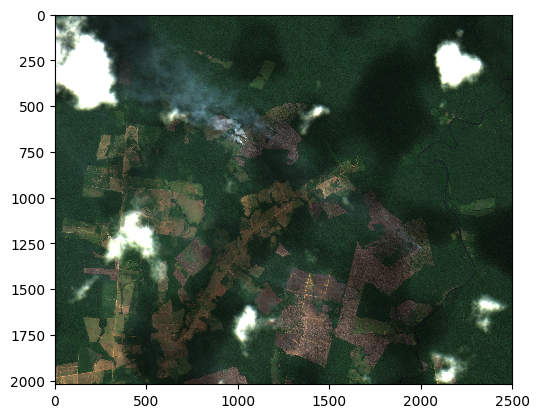

In [92]:
plt.imshow(cl_cloudy_img[:,:,[2, 1, 0]]*5, interpolation='nearest')
plt.show()